In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
cd /Users/austinmcdonald/Desktop/

/Users/austinmcdonald/Desktop


In [3]:
####################
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  ,     11  , 12    ,  13 , 14 ]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, LdiffTPC,LerrTPC, Mele, Merr]
########
Data = np.loadtxt("/Users/austinmcdonald/Desktop/FullEr-XeHe-No3.txt")
#Data = np.loadtxt("/Users/austinmcdonald/Desktop/FullEr-XeHe-No3.txt")

In [6]:
np.unique(Data[:,0])[1:]

array([79., 81., 84., 86., 89., 91.])

In [7]:
Fractions = [0,2,8,15,35,99,100]
Fractions = np.unique(Data[:,0])[1:]
#Fractions = error98

In [8]:
mm = dict()
this = Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(Data[x])
    mm[y] = np.array(hold)

In [9]:
COL = ['b','g','r','m','y','c','k','lime','orange']
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','grey','blue','red']


In [10]:
def MB_V(data,x):
    Vz = data[x][:,5]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    Yer =Vz*data[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab
    

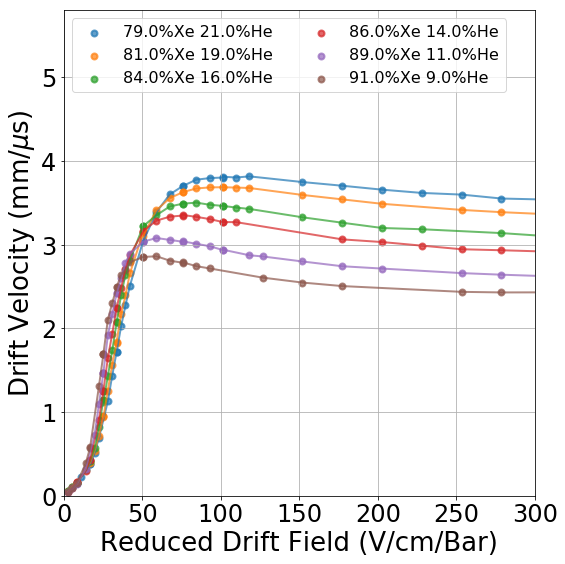

In [11]:
plt.figure(figsize=(8,8))
for x in range(0,len(mm)):
#for x in [4]:
    X,Y,Yer,lab = MB_V(mm,x)
    
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper left',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
plt.xlim(0,300)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

No handles with labels found to put in legend.


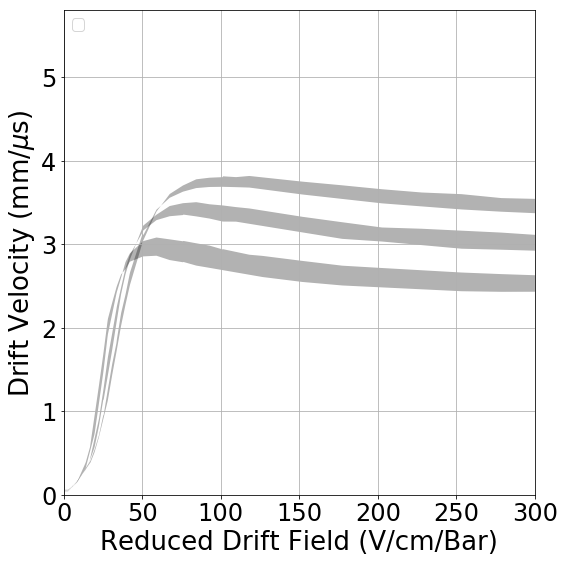

In [18]:
plt.figure(figsize=(8,8))
#for x in range(0,len(mm)):
for x in [0,2,4]:
    X1,Y1,Yer1,lab = MB_V(mm,x)
    X2,Y2,Yer2,lab2 = MB_V(mm,x+1)
    
    Xnew = np.linspace(0, 300, 1000)
    Y1new = np.interp(Xnew, X1, Y1)
    Y2new = np.interp(Xnew, X2, Y2)
    
    plt.fill_between(Xnew,Y1new,Y2new,facecolor='k',alpha=0.3, interpolate=True)
    #plt.scatter(Xnew,Y1new)
    #plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    #plt.plot(X1,Y1,linewidth=2,alpha=0.7)
    #plt.plot(X2,Y2,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper left',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
plt.xlim(0,300)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [16]:
len(X2)

33

In [19]:
def MB_D(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

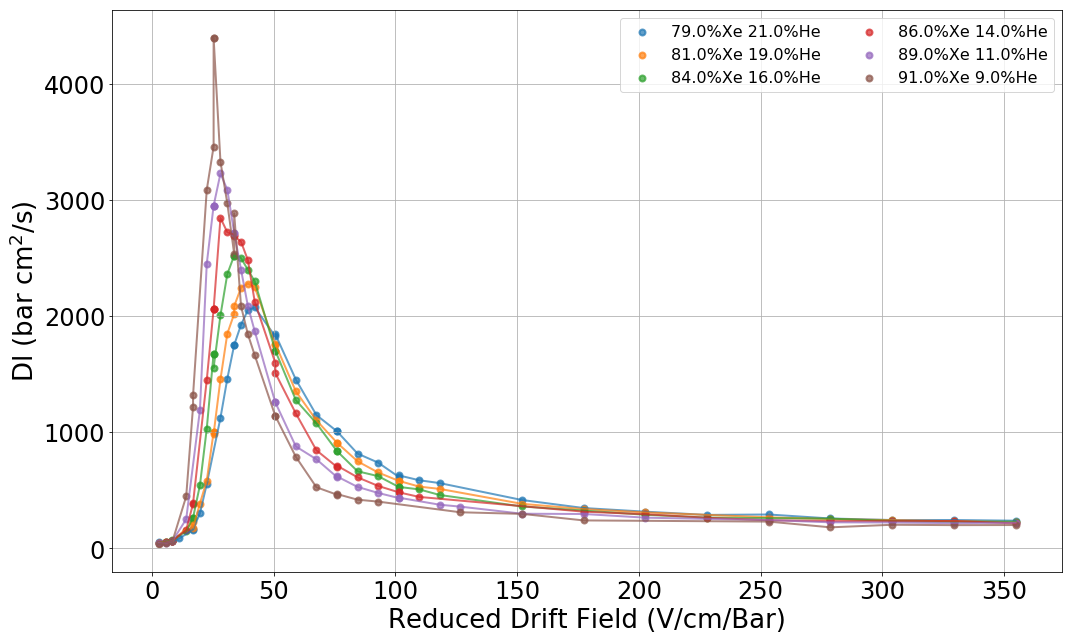

In [20]:
plt.figure(figsize=(15,9))

for x in range(0,len(mm)):
#for x in [4]:
    X,Y,Yer,lab = MB_D(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Dl (bar cm$^2$/s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

No handles with labels found to put in legend.


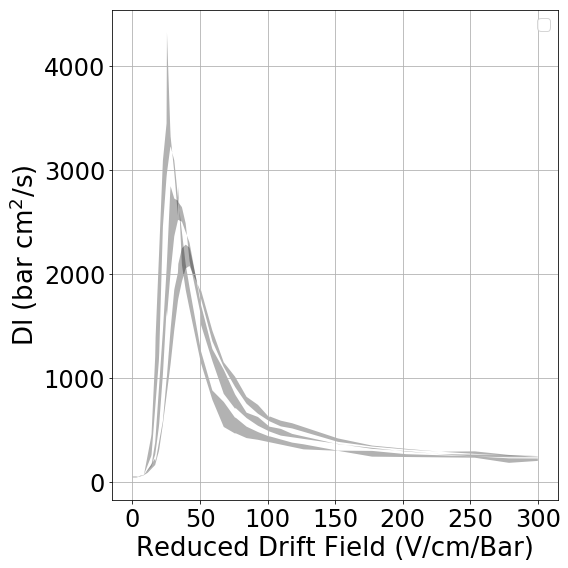

In [24]:
plt.figure(figsize=(8,8))
#for x in range(0,len(mm)):
for x in [0,2,4]:
    X1,Y1,Yer1,lab = MB_D(mm,x)
    X2,Y2,Yer2,lab2 = MB_D(mm,x+1)
    
    Xnew = np.linspace(0, 300, 1000)
    Y1new = np.interp(Xnew, X1, Y1)
    Y2new = np.interp(Xnew, X2, Y2)
    
    plt.fill_between(Xnew,Y1new,Y2new,facecolor='k',alpha=0.3, interpolate=True)

plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Dl (bar cm$^2$/s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [64]:
def MB_DS(data,x):
    Vz = data[x][:,11]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,12]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


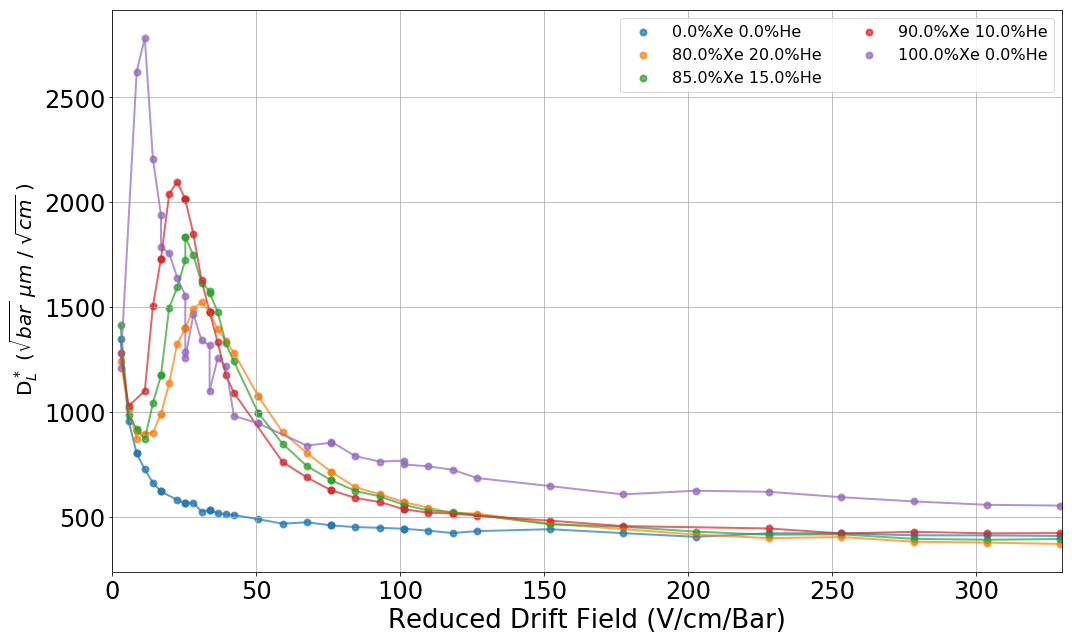

In [66]:
plt.figure(figsize=(15,9))

for x in range(0,len(mm)):
#for x in [4]:
    X,Y,Yer,lab = MB_DS(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
plt.xlim(0,330)
#plt.xlim(0,50)
#plt.xlim(0,100)

#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [67]:
def MB_DST(data,x):
    Vz = data[x][:,7]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,8]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


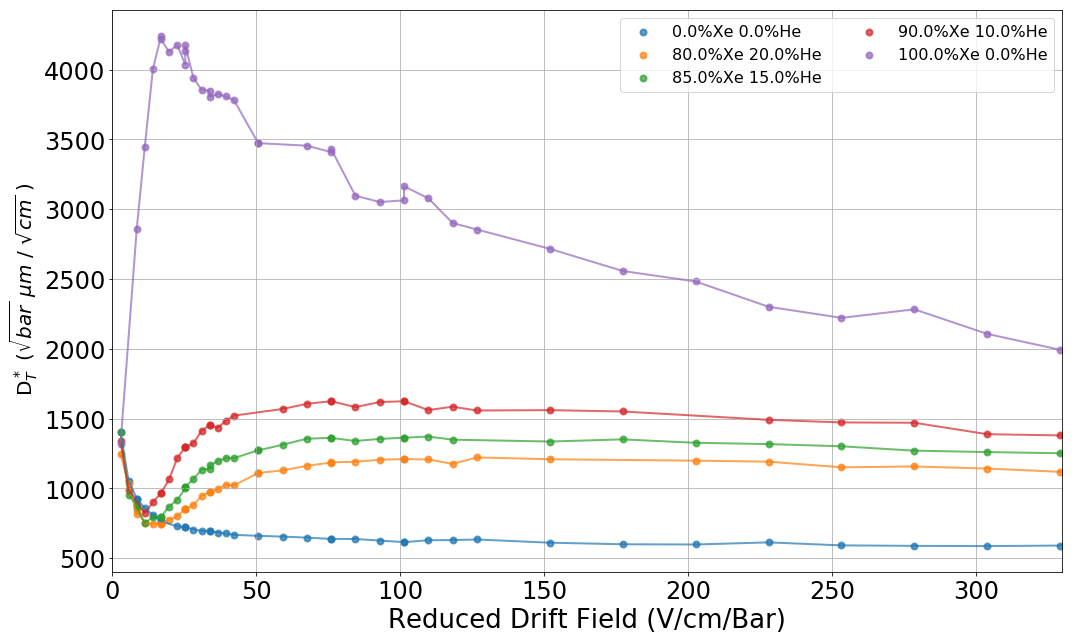

In [69]:
plt.figure(figsize=(15,9))

for x in range(0,len(mm)):
#for x in [4]:
    X,Y,Yer,lab = MB_DST(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r" D$^*_T$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
plt.xlim(0,330)
#plt.xlim(0,50)
#plt.xlim(0,100)

#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [14]:
def MB(data,x):
    Vz = data[x][:,13]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

In [15]:
MB(mm,3)

(array([  2.81481481,   5.62962963,  11.25925926,  14.07407407,
         16.88888889,  16.88888889,  19.7037037 ,  22.51851852,
         25.33333333,  25.33333333,  25.33333333,  28.14814815,
         30.96296296,  33.77777778,  33.77777778,  36.59259259,
         39.40740741,  42.22222222,  59.11111111,  67.55555556,
         76.        ,  76.        ,  84.44444444,  92.88888889,
        101.33333333, 101.33333333, 109.77777778, 118.22222222,
        126.66666667, 152.        , 177.33333333, 228.        ,
        253.33333333, 278.66666667, 304.        , 329.33333333,
        354.66666667]),
 array([0.0395, 0.0408, 0.0548, 0.0696, 0.0915, 0.0915, 0.1289, 0.1837,
        0.2394, 0.2394, 0.2394, 0.2989, 0.3646, 0.4173, 0.4173, 0.4595,
        0.5004, 0.5352, 0.6892, 0.7432, 0.7936, 0.7936, 0.8385, 0.878 ,
        0.918 , 0.918 , 0.9518, 0.9889, 1.0186, 1.1121, 1.1952, 1.3459,
        1.4138, 1.4804, 1.5507, 1.6087, 1.6742]),
 array([0.001817 , 0.0017952, 0.0092612, 0.01044  , 0.0129015,

In [16]:
plt.figure(figsize=(15,9))

for x in range(0,len(mm)):
    X,Y,Yer,lab = MB_D(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

NameError: name 'MB_D' is not defined

<Figure size 1080x648 with 0 Axes>

In [37]:
def MB_D(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

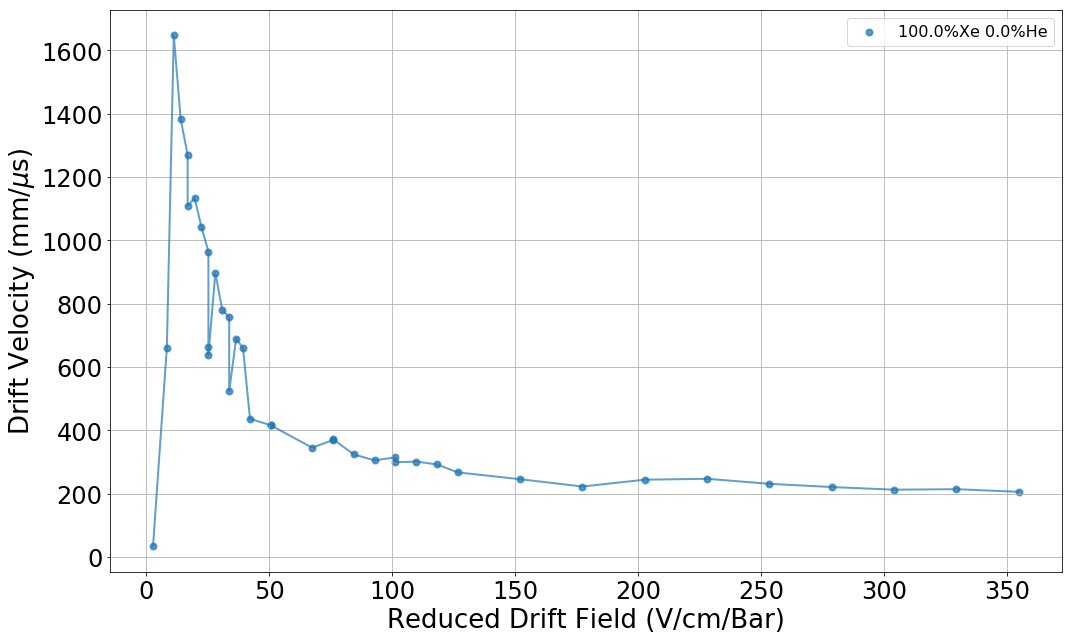

In [39]:
plt.figure(figsize=(15,9))

#for x in range(0,len(mm)):
for x in [4]:
    X,Y,Yer,lab = MB_D(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [40]:
X

array([  2.81481481,   8.44444444,  11.25925926,  14.07407407,
        16.88888889,  16.88888889,  19.7037037 ,  22.51851852,
        25.33333333,  25.33333333,  25.33333333,  28.14814815,
        30.96296296,  33.77777778,  33.77777778,  36.59259259,
        39.40740741,  42.22222222,  50.66666667,  50.66666667,
        67.55555556,  76.        ,  76.        ,  84.44444444,
        92.88888889, 101.33333333, 101.33333333, 109.77777778,
       118.22222222, 126.66666667, 152.        , 177.33333333,
       202.66666667, 228.        , 253.33333333, 278.66666667,
       304.        , 329.33333333, 354.66666667])

In [41]:
Y

array([  33.55460526,  660.25657895, 1647.53289474, 1382.86184211,
       1270.06578947, 1107.53289474, 1134.17763158, 1041.80921053,
        964.53947368,  663.45394737,  637.5       ,  897.03947368,
        780.69078947,  757.24342105,  523.125     ,  689.92105263,
        659.10197368,  436.08552632,  415.95394737,  415.85526316,
        344.90131579,  369.57236842,  371.84210526,  323.58552632,
        304.93421053,  314.40789474,  299.01315789,  301.08552632,
        292.11513158,  266.94078947,  245.42763158,  222.33552632,
        243.94736842,  246.71052632,  230.82236842,  220.55921053,
        212.36842105,  213.84868421,  205.55921053])

In [17]:
def MB_Dmu(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz/(data[x][:,5]/E)
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


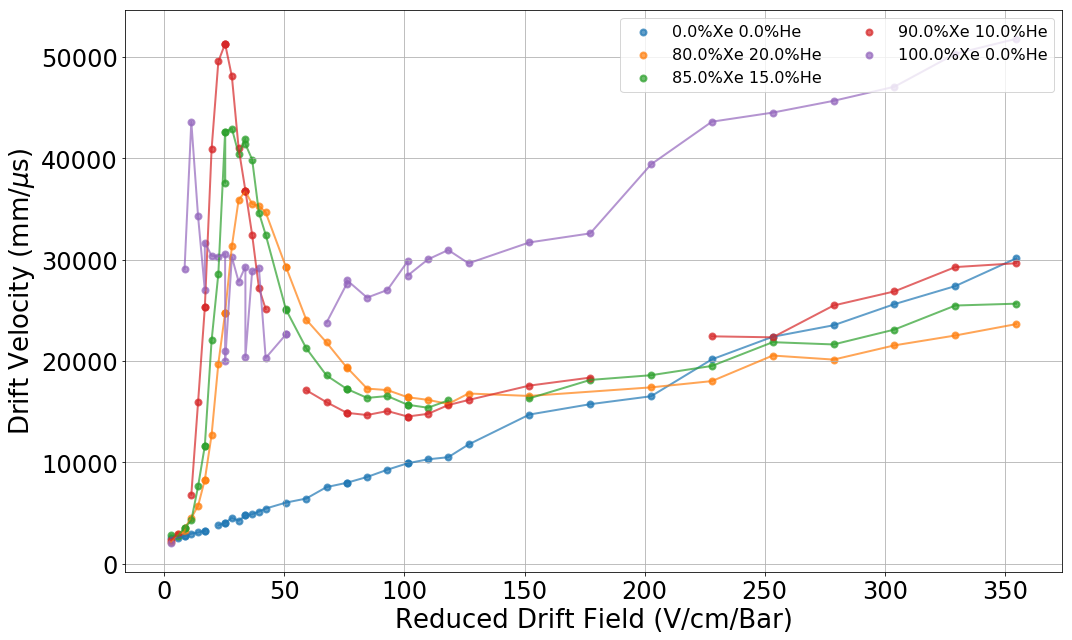

In [18]:
plt.figure(figsize=(15,9))

for x in range(0,len(mm)):
    X,Y,Yer,lab = MB_Dmu(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


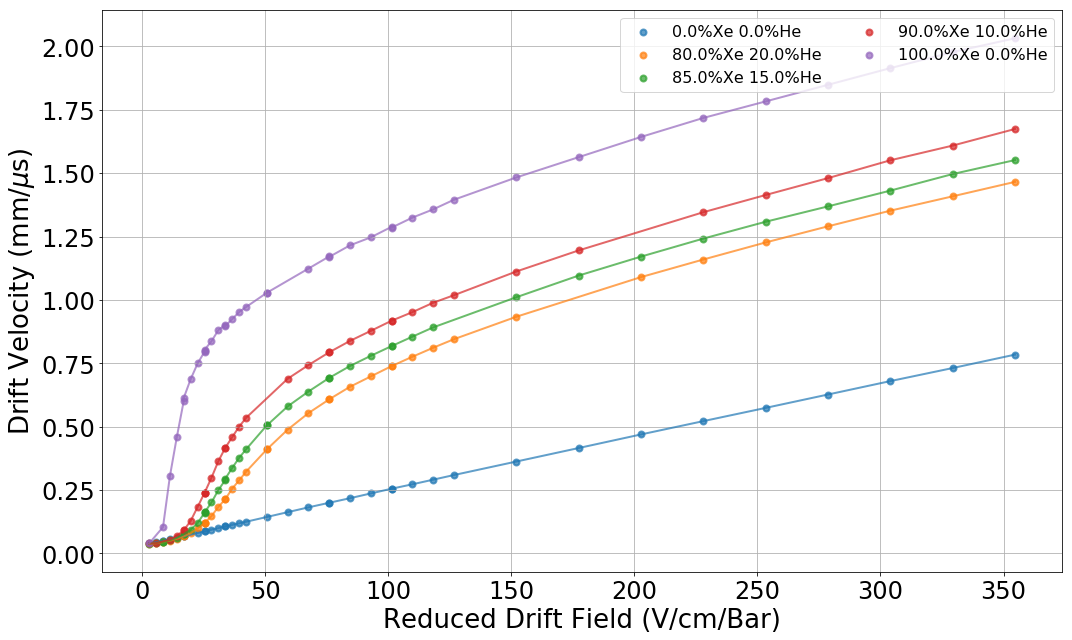

In [19]:
plt.figure(figsize=(15,9))

for x in range(0,len(mm)):
    X,Y,Yer,lab = MB(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [ ]:
def MB_D(data,x):
    Vz = data[x][:,11]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,12]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

In [20]:
def MB_DS(data,x):
    Vz = data[x][:,11]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,12]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

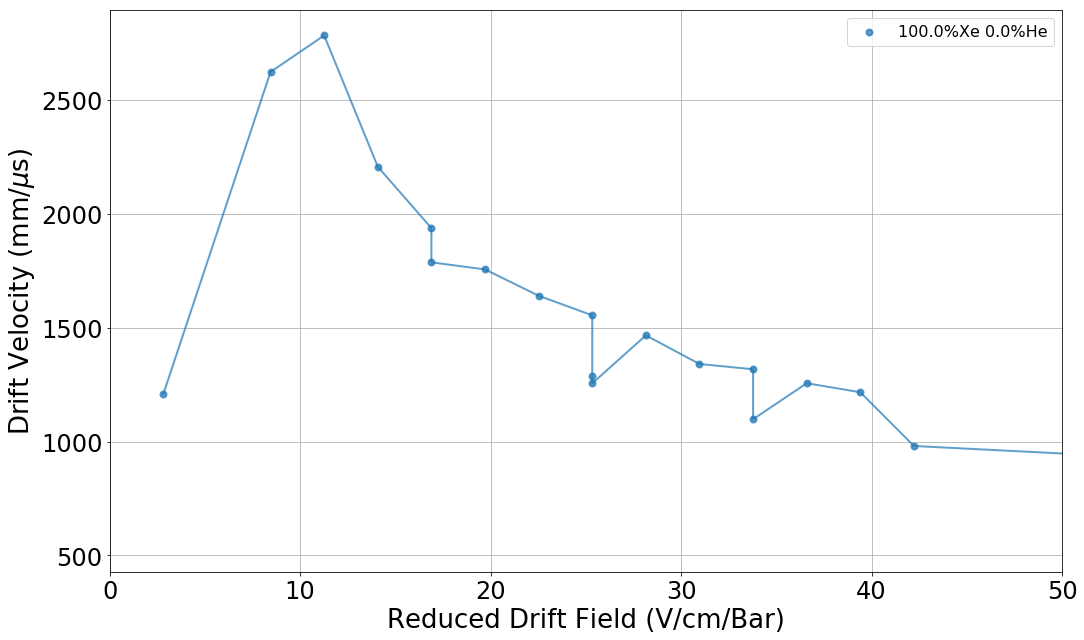

In [26]:
plt.figure(figsize=(15,9))

#for x in range(0,len(mm)):
for x in [4]:
    X,Y,Yer,lab = MB_DS(mm,x)
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
plt.xlim(0,330)
plt.xlim(0,50)
#plt.xlim(0,100)

#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [27]:
X

array([  2.81481481,   8.44444444,  11.25925926,  14.07407407,
        16.88888889,  16.88888889,  19.7037037 ,  22.51851852,
        25.33333333,  25.33333333,  25.33333333,  28.14814815,
        30.96296296,  33.77777778,  33.77777778,  36.59259259,
        39.40740741,  42.22222222,  50.66666667,  50.66666667,
        67.55555556,  76.        ,  76.        ,  84.44444444,
        92.88888889, 101.33333333, 101.33333333, 109.77777778,
       118.22222222, 126.66666667, 152.        , 177.33333333,
       202.66666667, 228.        , 253.33333333, 278.66666667,
       304.        , 329.33333333, 354.66666667])

In [28]:
Y

array([1208.06192218, 2622.65751253, 2782.95341178, 2206.5801764 ,
       1937.13155241, 1786.7293096 , 1755.76267449, 1640.18762347,
       1554.09864953, 1286.00538177, 1255.35170092, 1466.20069551,
       1340.51979375, 1317.31597365, 1097.89365663, 1255.98052266,
       1216.46309979,  980.49761083,  944.75521303,  944.75548585,
        839.0146336 ,  852.51141004,  857.82787085,  788.13940045,
        762.72931377,  767.01193198,  748.96443736,  739.68335622,
        723.59901912,  684.07559719,  645.78502241,  606.08680087,
        623.39578972,  618.5271399 ,  592.71763353,  572.45328186,
        556.26782759,  552.70947142,  540.25919839])

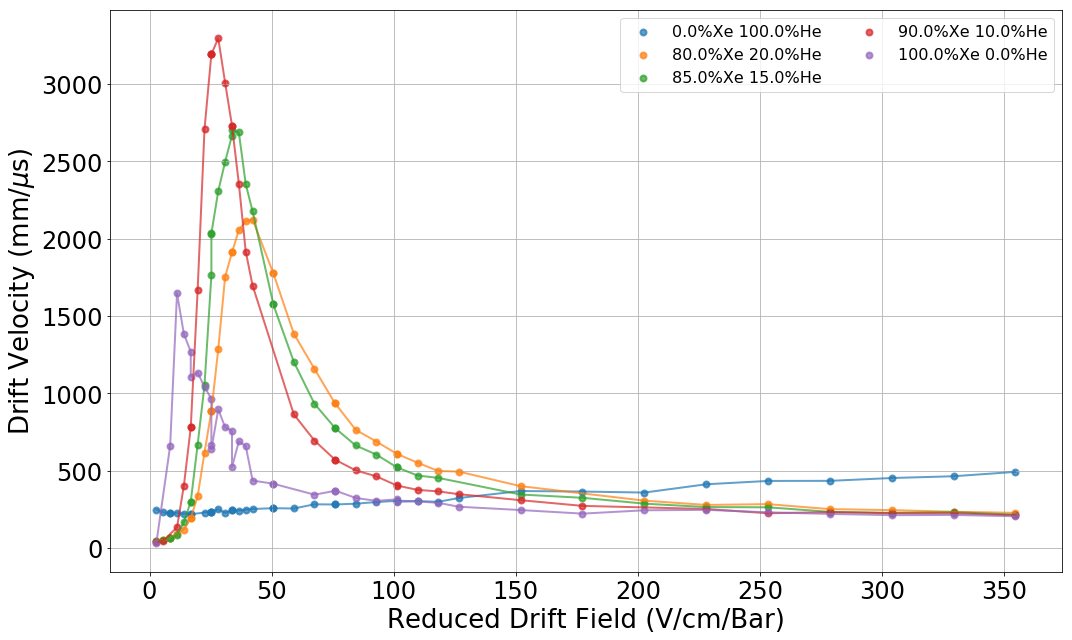

In [53]:
DDD=[]
plt.figure(figsize=(15,9))
#for x in [2, 3]:
#for x in [2, 7]:
for x in range(0,len(mm)):

    Vz = mm[x][:,9]
    #err= mm[x][:,6]/100*Vz
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*mm[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    #####################################

    
    
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
    plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')


    plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

# 

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


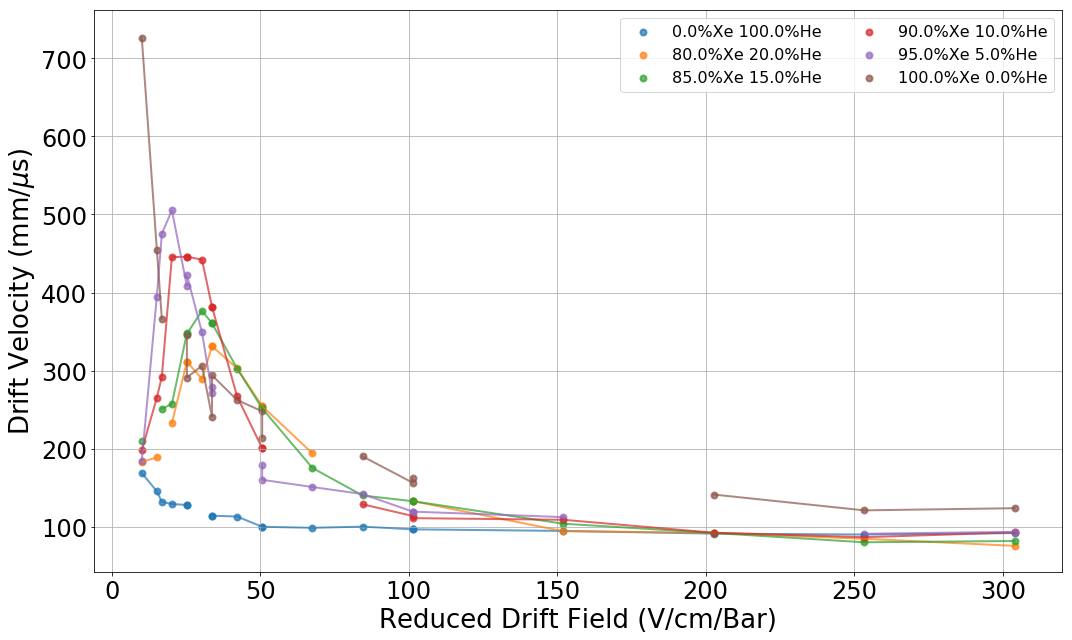

In [24]:
DDD=[]
plt.figure(figsize=(15,9))
#for x in [2, 3]:
#for x in [2, 7]:
for x in range(0,len(mm)):

    Vz = mm[x][:,9]
    #err= mm[x][:,6]/100*Vz
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = np.sqrt(Vz*P/mm[x][:,5])*10
    Yer =Vz*mm[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    #####################################

    
    
    plt.scatter(X,Y,linewidth=2,alpha=0.7,label=lab)
    plt.plot(X,Y,linewidth=2,alpha=0.7)
   


    plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,5.8)
#plt.ylim(0,2)
#plt.semilogx()
#plt.xlim(0,330)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [42]:
tt=[]
N = 1
Vz = mm[2*N][:,5]
err= mm[2*N][:,6]/100*Vz
P  = mm[2*N][:,3]/760
E  = mm[2*N][:,4]
X = E/P
Y = Vz
Yer =err
tt.append(Y)
tt.append(Y+Yer)
tt.append(Y-Yer)

Vz = mm[2*N+1][:,5]
err= mm[2*N+1][:,6]/100*Vz
P  = mm[2*N+1][:,3]/760
E  = mm[2*N+1][:,4]

X = E/P
Y = Vz
Yer = err
tt.append(Y)
tt.append(Y+Yer)
tt.append(Y-Yer)
upper = []
lower = []
XVAL = []
tt = np.array(tt)
for x in range(0,len(tt[0])):
    if np.any(tt[:,x]==0)==False:
        MAX = max(tt[:,x])
        MIN = min(tt[:,x])
        upper.append(MAX)
        lower.append(MIN)
        XVAL.append(X[x])

upper = np.array(upper)
lower = np.array(lower)
XVAL = np.array(XVAL)
SORT = XVAL.argsort()
upper = upper[SORT]
lower = lower[SORT]
XVAL = XVAL[SORT]

IndexError: too many indices for array

In [43]:
for x in range(0,len(tt)):
    print(len(tt[x]))

35
35
35
33
33
33


In [39]:
tt[5]

array([3.1841664 , 3.2712312 , 3.1689821 , 2.9843156 , 2.8921743 ,
       0.        , 2.771028  , 0.39486055, 1.6170196 , 2.4855564 ,
       3.1841664 , 3.329312  , 3.2552222 , 3.1689821 , 0.14940712,
       0.        , 0.39486055, 1.3867016 , 2.4855564 , 3.0669591 ,
       3.1841664 , 0.07847728, 0.14455268, 0.2308014 , 0.39486055,
       0.9913288 , 1.8583872 , 2.4855564 , 0.07877008, 0.10888065,
       0.14617196, 0.2845136 , 0.5484864 , 1.112262  , 1.7872758 ])

In [40]:
tt[:,0]

array([3.343    , 3.3774329, 3.3085671, 3.232    , 3.2798336, 3.1841664])

In [26]:
np.any(tt[:,0]==0)

IndexError: too many indices for array

In [17]:
def BAND(DIC,N):
    tt=[]
    Vz = mm[2*N][:,5]
    err= mm[2*N][:,6]/100*Vz
    P  = mm[2*N][:,3]/760
    E  = mm[2*N][:,4]
    X = E/P
    Y = Vz
    Yer =err
    tt.append(Y)
    tt.append(Y+Yer)
    tt.append(Y-Yer)

    Vz = mm[2*N+1][:,5]
    err= mm[2*N+1][:,6]/100*Vz
    P  = mm[2*N+1][:,3]/760
    E  = mm[2*N+1][:,4]

    X = E/P
    Y = Vz
    Yer = err
    tt.append(Y)
    tt.append(Y+Yer)
    tt.append(Y-Yer)
    upper = []
    lower = []
    XVAL = []
    tt = np.array(tt)
    for x in range(0,len(tt[0])):
        if np.any(tt[:,x]==0)==False:
            MAX = max(tt[:,x])
            MIN = min(tt[:,x])
            upper.append(MAX)
            lower.append(MIN)
            XVAL.append(X[x])

    upper = np.array(upper)
    lower = np.array(lower)
    XVAL = np.array(XVAL)
    SORT = XVAL.argsort()
    upper = upper[SORT]
    lower = lower[SORT]
    XVAL = XVAL[SORT]
    return XVAL,upper,lower

0
1


IndexError: too many indices for array

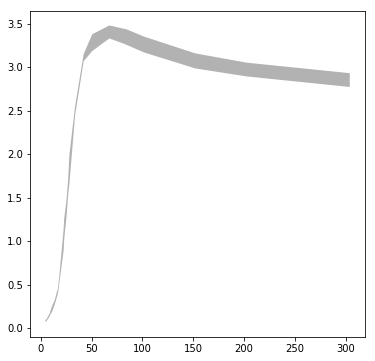

In [18]:
DDD=[]
plt.figure(figsize=(6,6))

for x in range(0,5):
    print(x)
    x,y1,y2 = BAND(mm,x)
    plt.fill_between(x,y1,y2,facecolor='k',alpha=0.3, interpolate=True)
    DDD.append(x)
    DDD.append(y1)
    DDD.append(y2)

#plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
#plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
#plt.fill_between(XVAL,upper,lower,facecolor='k',alpha=0.3, interpolate=True)
#plt.scatter(XVAL,upper)   
#plt.scatter(XVAL,lower)   

plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
#plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,3.8)
plt.xlim(0,230)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

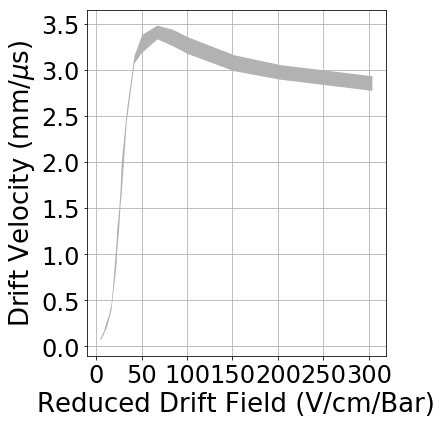

In [117]:
DDD=[]
plt.figure(figsize=(6,6))

q=0
x,y1,y2 = BAND(mm,q)
plt.fill_between(x,y1,y2,facecolor='k',alpha=0.3, interpolate=True)


#plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
#plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
#plt.fill_between(XVAL,upper,lower,facecolor='k',alpha=0.3, interpolate=True)
#plt.scatter(XVAL,upper)   
#plt.scatter(XVAL,lower)   

plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
#plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,3.8)
#plt.xlim(0,230)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [113]:
x

array([], dtype=float64)

IndexError: too many indices for array

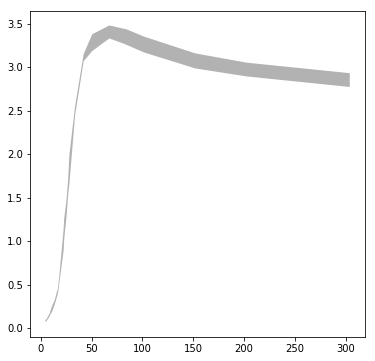

In [95]:
DDD=[]
plt.figure(figsize=(6,6))

for q in range(0,3):
    x,y1,y2 = BAND(mm,q)
    plt.fill_between(x,y1,y2,facecolor='k',alpha=0.3, interpolate=True)
    DDD.append(x)
    DDD.append(y1)
    DDD.append(y2)

#plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
#plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
#plt.fill_between(XVAL,upper,lower,facecolor='k',alpha=0.3, interpolate=True)
#plt.scatter(XVAL,upper)   
#plt.scatter(XVAL,lower)   

plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
#plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,3.8)
plt.xlim(0,230)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [31]:
DDD = np.array(DDD)
#np.save('TTT.npy',DDD)

In [32]:
#MBZV = np.load("/Users/austinmcdonald/Documents/Gas-physics/MB-Error.npy")
MBZV = np.load("/Users/austinmcdonald/Documents/Gas-physics/TTT.npy")

No handles with labels found to put in legend.


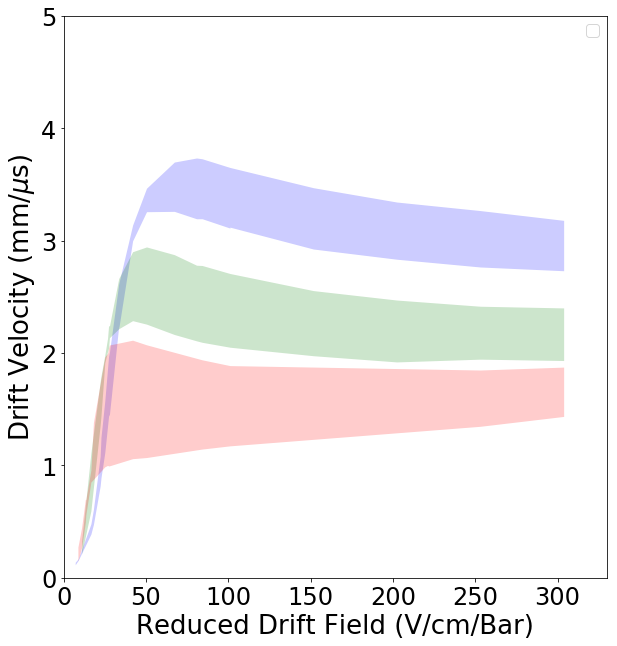

In [38]:
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','pink','blue']
plt.figure(figsize=(9,9))
#for q in range(0,len(GOLDD)):
for q in range(0,3):
  

    
    eh1 =q*3
    eh2 =q*3+1
    eh3 =q*3+2
    X = MBZV[eh1]
    Y1 = MBZV[eh2]
    Y2 = MBZV[eh3]
    plt.fill_between(X,Y1,Y2,facecolor=COL[q],alpha=0.2, interpolate=True)
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=4)
plt.tight_layout()

plt.grid()
plt.ylim(0,5)
#plt.ylim(0,2)

plt.xlim(0,330)
#plt.xlim(0,130)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/XeHe/Vdrifr"+'ALL'+".png")

plt.show()

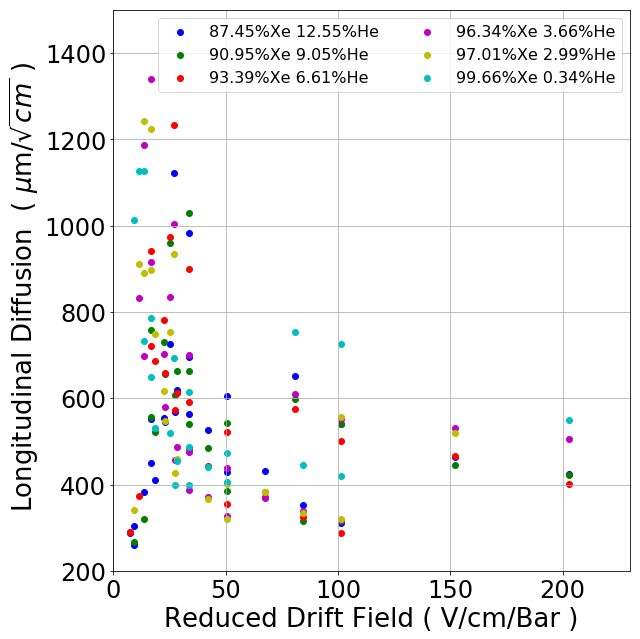

In [90]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [0, 1, 2, 3, 4,5]:
    Vz = mm[x][:,9]
    err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Vz,label=lab, color=COL[x])
    #plt.errorbar(E/P,Vz,yerr=err,color=COL[x],alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r' Longitudinal Diffusion  ( $\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,230)
plt.ylim(200,1500)
plt.show()

In [15]:
xx =[22.854850598683974,28.451871561612315,25.976097587285608,26.319397001186584,28.014994067095756,
    28.519560605515803,29.997258279098197,33.05297364352235,33.95935960591133,38.01773578799755,
    37.9184944806012,38.25720937758441,41.933991945633025,43.51618963719392,44.248768472906406,
    47.63214195821797,48.660556973859265,53.69206429110784,57.135441012548995]
yy = [1359.8234511524215, 1319.460824853475, 1212.1804322030848, 1166.3406565747364, 1159.099816619323, 1200.6031785983962
    , 1107.4538851533564, 1055.756714968897, 1029.9377943979, 1129.9827406421919, 983.9254251914708, 986.773219229801
    , 939.3423465535218, 936.4028621768364, 956.4156269102153, 1024.9892129013697, 903.2217467908381, 868.6140376110171
    , 899.9532559059364]

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
No handles with labels found to put in legend.


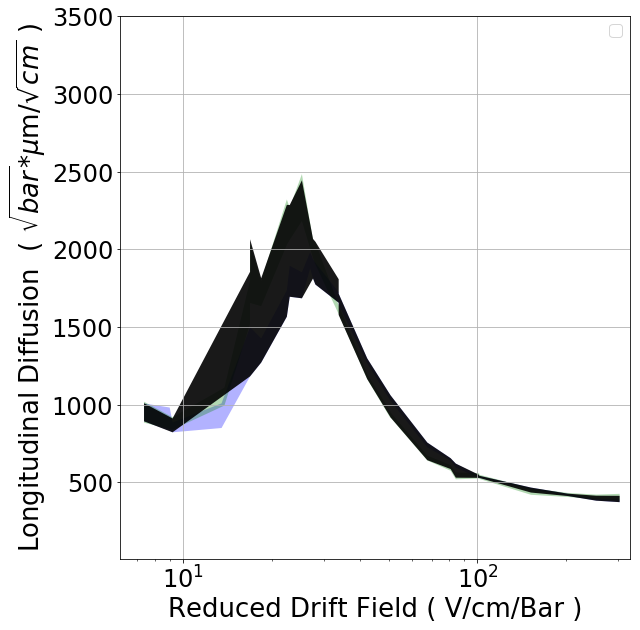

In [100]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','pink','blue']

Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
DDD = []
plt.figure(figsize=(9,9))
for x in [0, 1]:
#for x in [0, 1]:


    Vd = mm[x][:,5]
    Vz = mm[x][:,9]
    #err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    Dr = np.sqrt((273/296*2*P)*Vz/Vd)
    Dr = Vz*np.sqrt(P)
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Dr
    Yer =Dr*mm[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    #plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
    #plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
    plt.fill_between(X,Y+Yer,Y-Yer,facecolor=COL[x],alpha=0.3, interpolate=True)
    #plt.errorbar(REDU[q],DlStar[q]/2.355,xerr=Xer,yerr=Yer,ecolor=COL[q],fmt='none', capthick=1)

    DDD.append(X)
    DDD.append(Y)
    DDD.append(Yer)
    
    
x,y1,y2 = BANDL(mm,0)
plt.fill_between(x,y1,y2,facecolor='k',alpha=0.9, interpolate=True)

plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.semilogx()
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

In [96]:
'''Vd = mm[x][:,5]
Vz = mm[x][:,9]
#err = mm[x][:,10]/100*mm[x][:,9]
P  = mm[x][:,3]/760
E  = mm[x][:,4]
Dr = np.sqrt((273/296*2*P)*Vz/Vd)
Dr = Vz*np.sqrt(P)
xe = str(mm[x][0][0])
ar = str(mm[x][0][1])
lab = xe+'%Xe '+ar+'%He'
X = E/P
Y = Dr
Yer =Dr*mm[x][:,10]/100
drop = np.where(Y == 0)[0]
X = np.delete(X,drop)
Y = np.delete(Y,drop)
Yer=np.delete(Yer,drop)
SORT = X.argsort()
X = X[SORT]
Y = Y[SORT]
Yer = Yer[SORT]
'''    
def BANDL(DIC,N):
    tt=[]
    Vz = mm[2*N][:,9]
    err= mm[2*N][:,6]/100*Vz
    P  = mm[2*N][:,3]/760
    E  = mm[2*N][:,4]
    Dr = Vz*np.sqrt(P)
    X = E/P
    Y = Dr
    Yer =Dr*mm[2*N][:,10]/100
    tt.append(Y)
    tt.append(Y+Yer)
    tt.append(Y-Yer)

    Vz = mm[2*N+1][:,9]
    err= mm[2*N+1][:,6]/100*Vz
    P  = mm[2*N+1][:,3]/760
    E  = mm[2*N+1][:,4]
    Dr = Vz*np.sqrt(P)
    X = E/P
    Y = Dr
    Yer = Dr*mm[2*N][:,10]/100
    tt.append(Y)
    tt.append(Y+Yer)
    tt.append(Y-Yer)
    upper = []
    lower = []
    XVAL = []
    tt = np.array(tt)
    for x in range(0,len(tt[0])):
        if np.any(tt[:,x]==0)==False:
            MAX = max(tt[:,x])
            MIN = min(tt[:,x])
            upper.append(MAX)
            lower.append(MIN)
            XVAL.append(X[x])

    upper = np.array(upper)
    lower = np.array(lower)
    XVAL = np.array(XVAL)
    SORT = XVAL.argsort()
    upper = upper[SORT]
    lower = lower[SORT]
    XVAL = XVAL[SORT]
    return XVAL,upper,lower

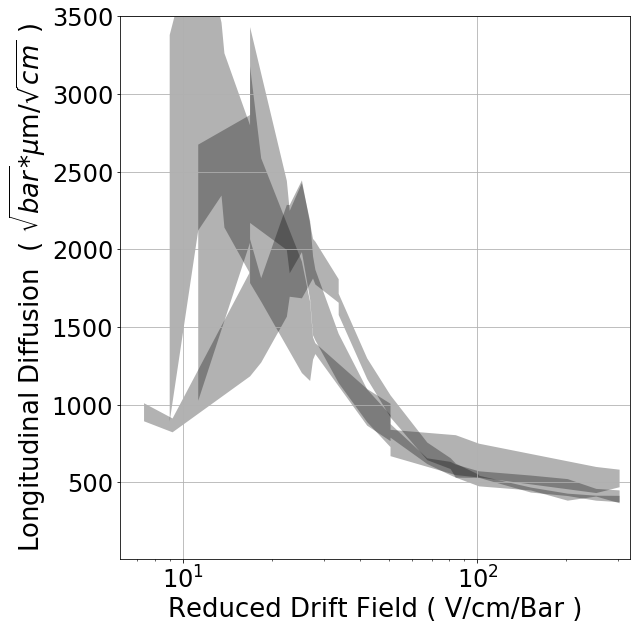

In [105]:
DDD=[]
plt.figure(figsize=(9,9))

for q in range(0,3):
    x,y1,y2 = BANDL(mm,q)
    plt.fill_between(x,y1,y2,facecolor='k',alpha=0.3, interpolate=True)
    DDD.append(x)
    DDD.append(y1)
    DDD.append(y2)

plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
#plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.semilogx()
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

In [106]:
DDD = np.array(DDD)
#np.save('MB-XeHe-Dl.npy',DDD)

No handles with labels found to put in legend.


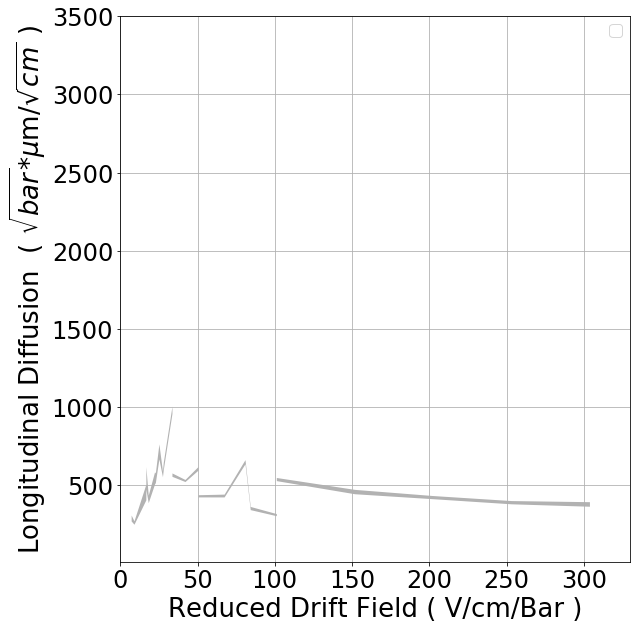

In [49]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
DDD = []
plt.figure(figsize=(9,9))
#for x in [0, 1, 2, 3, 4,5,6]:
for x in [ 0]:
#for x in [ 0,1, 2, 3, 4,5,6,7,8,9]:

#for x in range(1,len(mm)):
    x1 = 2*x
    x2 = 2*x+1

    Vz = mm[x1][:,9]
    err= mm[x1][:,6]/100*Vz
    P  = mm[x1][:,3]/760
    E  = mm[x1][:,4]
    xe = str(mm[x1][0][0])
    ar = str(mm[x1][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y1 = Vz
    YerUP =Vz*mm[x1][:,10]/100
    drop1 = np.where(Y1 == 0)[0]
    #####################################
    Vz = mm[x2][:,9]
    err= mm[x2][:,6]/100*Vz
    P  = mm[x2][:,3]/760
    E  = mm[x2][:,4]
    X = E/P
    Y2 = Vz
    YerDN =Vz*mm[x2][:,10]/100
    drop2 = np.where(Y2 == 0)[0]
    DROP = np.unique(np.concatenate((drop1,drop2),0))
    XX  = np.delete(X,DROP)
    Y1  = np.delete(Y1,DROP)
    Y2  = np.delete(Y2,DROP)
    YY = Y1
    YerUP = np.delete(YerUP,DROP)
    YerDN = np.delete(YerDN,DROP)
    SORT = XX.argsort()
    XX = XX[SORT]
    YY = YY[SORT]
    YerUP = YerUP[SORT]
    YerDN = YerDN[SORT]
   
    
    #plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
    #plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
    plt.fill_between(XX,YY+YerUP,YY-YerDN,facecolor='k',alpha=0.3, interpolate=True)
    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

In [36]:
DDD = np.array(DDD)
#np.save('MB-XeAr-Dl.npy',DDD)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


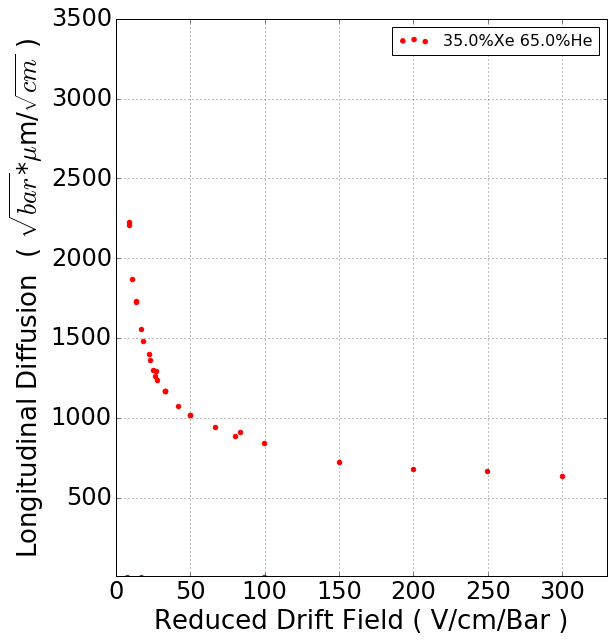

In [101]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [ 2]:
#for x in [5]:

    Vd = mm[x][:,5]
    Vz = mm[x][:,9]
    #err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760*1.014
    E  = mm[x][:,4]
    Dr = np.sqrt((273/296*2*P)*Vz/Vd)
    Dr = Vz*np.sqrt(P)
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Dr,label=lab, color=COL[x])
    #plt.scatter(xx,yy, color='lime',label='NEXT data')
    #plt.errorbar(E/P,Vz,yerr=err,color=col,alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

In [14]:
P*1.014

array([  1.01466711,   1.01466711,   1.01466711,   1.01466711,
         1.01466711,   1.01466711,   3.04400132,   3.04400132,
         3.04400132,   3.04400132,   3.04400132,   3.04400132,
         6.08800263,   6.08800263,   6.08800263,   6.08800263,
         6.08800263,   6.08800263,   9.13200395,   9.13200395,
         9.13200395,   9.13200395,   9.13200395,   9.13200395,
        11.16133816,  11.16133816,  11.16133816,  11.16133816,
        11.16133816,  11.16133816])

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


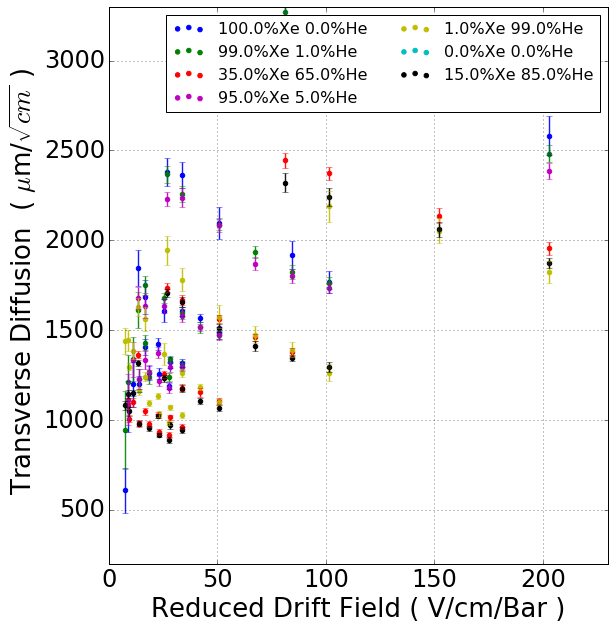

In [79]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [0, 1, 2, 3, 4,5,6]:
    Vz = mm[x][:,7]
    err = mm[x][:,8]/100*mm[x][:,7]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Vz,label=lab, color=COL[x])
    plt.errorbar(E/P,Vz,yerr=err,color=COL[x],alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)


#plt.scatter(NEXTX,NEXTY,color='r',alpha=0.4,label="All NEXT Xe data")

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r' Transverse Diffusion  ( $\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,230)
plt.ylim(200,3300)
plt.show()

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


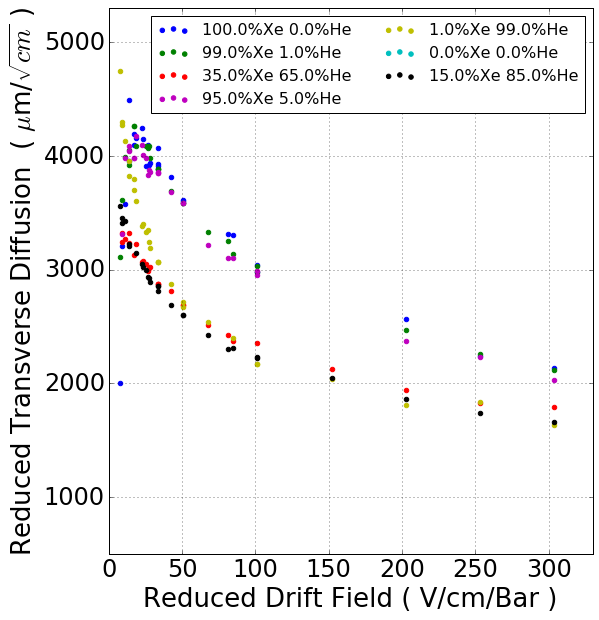

In [80]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [0, 1, 2, 3, 4,5,6]:
    Vd = mm[x][:,5]
    Vz = mm[x][:,7]
    #err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    Dr = np.sqrt((273/296*2*P)*Vz/Vd)
    Dr = Vz*np.sqrt(P)
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Dr,label=lab, color=COL[x])
    #plt.errorbar(E/P,Vz,yerr=err,color=col,alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)


#plt.scatter(NEXTX,NEXTY,color='r',alpha=0.4,label="All NEXT Xe data")

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Reduced Transverse Diffusion  ( $\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(500,5300)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'Trans.png')

plt.show()